
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Regression <br>
<font color=696880 size=4>
Mahan Bayhaghi & Arash Ziyaei Razban


____

## Personal Data

In [ ]:
# please fill in your student number and name
student_number = '401105989'
Name = 'Amirhosein'
Last_Name = 'Rezaei'

In this notebook, we will implement regression methods. We will start from simple Linear Regression and make our way towards more complicated regressors as well.

##Libraries

You are not allowed to use sklearn ready regression methods.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Linear and Polynomieal Regression (60 points)


### Linear Regression (10 points)


Linear regression assumes a linear relationship between the input features and the output. The model predicts $ y $ using the equation:

$$
y = \mathbf{Xw} + b
$$

Here:
- $ \mathbf{X} $: The matrix of input features.
- $ \mathbf{w} $: The weight vector (parameters).
- $ b $: The bias term.
- $ y $: The predicted output.

The objective is to find $ \mathbf{w} $ and $ b $ that minimize the error between predicted and actual values. The error is typically measured using the **Mean Squared Error (MSE):**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$


The optimal solution for $ \mathbf{w} $ and $ b $ can be computed directly using the closed-form equation:

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

Where:
- $ \mathbf{X}^T $: Transpose of the feature matrix.
- $ (\mathbf{X}^T \mathbf{X})^{-1} $: Inverse of the Gram matrix.

For simplicity, $ b $ (bias) can be incorporated into $ \mathbf{X} $ by adding a column of ones.

We implement linear regression from scratch using a custom class `LinearRegressor`:

1. **Initialization:** The class stores model weights.
2. **Fitting the Model:** The `fit` method computes weights using the closed-form solution.
3. **Prediction:** The `predict` method uses the weights to make predictions for new data.


In [1]:

class LinearRegressor:
    def __init__(self):
        """
        Initialize the PolynomialRegressor.
        The model will learn the parameters (weights and bias) using linear regression.
        """
        self.weights = None

    def fit(self, X, y):
        """
        Fits the linear regression model using the closed-form solution.

        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).
        - y (ndarray): Target values of shape (n_samples,).
        """
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        self.weights = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

    def predict(self, X):
        """
        Predicts target values using the fitted model.

        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).

        Returns:
        - ndarray: Predicted values of shape (n_samples,).
        """
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        return X_bias @ self.weights


In this section, generate a synthetic linear dataset and utilize the implemented LinearRegressor to fit and evaluate it. Your calculated weights and real weights must be similar:

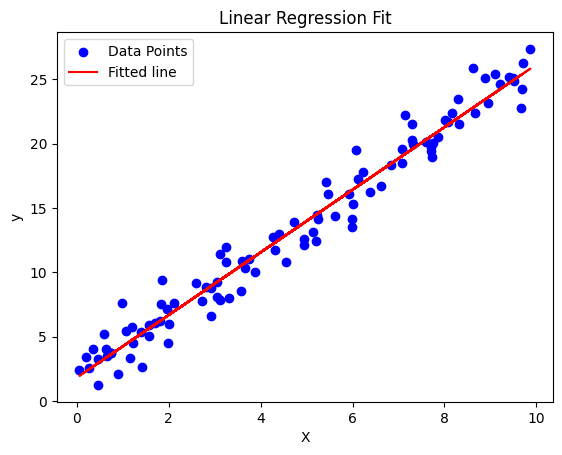

Estimated Weights: [1.82264424 2.43103402]


In [ ]:

#TODO: Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y_true = 2.5 * X.flatten() + 1.5
noise = np.random.randn(100) * 1.5
y = y_true + noise

#TODO: Initialize and train the model
linear_regressor = LinearRegressor()
linear_regressor.fit(X, y)

#TODO: Make predictions
y_pred = linear_regressor.predict(X)

#TODO: Visualize the results
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X, y_pred, color="red", label="Fitted line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

#TODO: Display weights
print("Estimated Weights:", linear_regressor.weights)

### Polynomial Regression (25 points)


Polynomial Regression is an extension of Linear Regression that models the relationship between the dependent and independent variables as an nth-degree polynomial.

Given the features \(X\), polynomial regression tries to fit a model of the form:

$$
y = w_0 + w_1 X + w_2 X^2 + w_3 X^3 + \dots + w_n X^n
$$

Where:
- $X$ is the input feature.
- $w_0, w_1, \dots, w_n$ are the weights (coefficients) to be learned.
- $n$ is the degree of the polynomial.

To fit this model, we can use the same closed-form solution as in linear regression, but now the features include powers of $X$.


In [ ]:

class PolynomialRegressor:
    def __init__(self, degree=2):
        """
        Initialize the PolynomialRegressor.

        Args:
        - degree (int): The degree of the polynomial to fit.
        """
        self.degree = degree
        self.weights = None

    def fit(self, X, y):
        """
        Fits the polynomial regression model using the closed-form solution.

        Args:
        - X (ndarray): Input features of shape (n_samples, 1).
        - y (ndarray): Target values of shape (n_samples,).
        """
        X_poly = np.hstack([X ** i for i in range(self.degree + 1)])
        self.weights = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    def predict(self, X):
        """
        Predicts target values using the fitted polynomial regression model.

        Args:
        - X (ndarray): Input features of shape (n_samples, 1).

        Returns:
        - ndarray: Predicted values of shape (n_samples,).
        """
        X_poly = np.hstack([X ** i for i in range(self.degree + 1)])
        return X_poly @ self.weights


Let's create a sample dataset of size 100 from following formula:

$$
y = x^4 - 4x^3 + 16 x + 4ϵ \ \ \ , \ \ \ x \in [-2, 2]
$$

where $\epsilon$ represents noise drawn from a $\mathcal{N}(0, 1)$ distribution.

The dataset will be split into 80% training data and 20% test data. Next, visualize the fitted polynomial curves for degrees ranging from 3 to 11. Additionally, compute and display the RMSE for both the training and test sets:

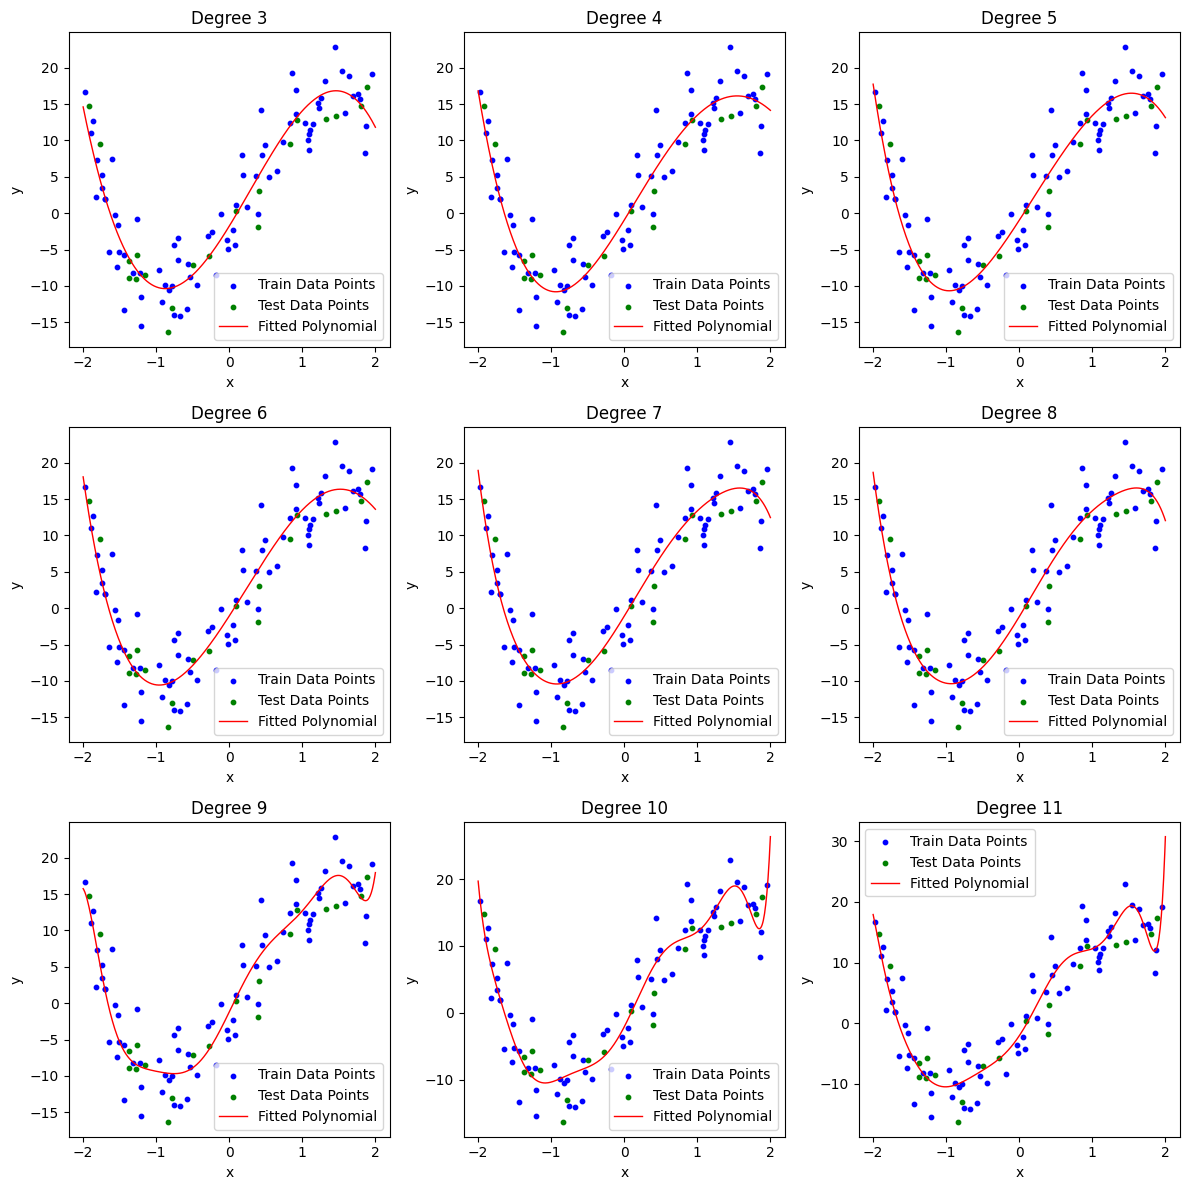

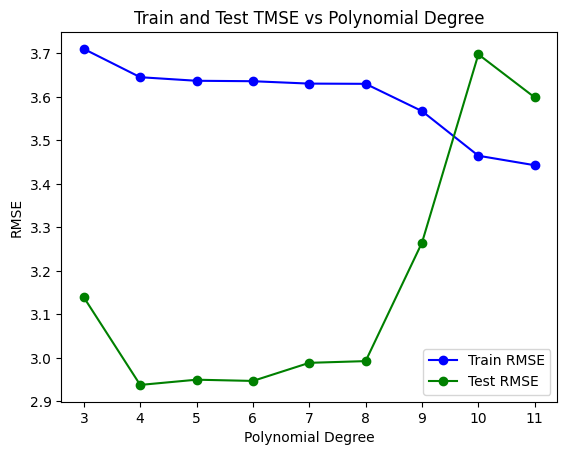

In [ ]:
np.random.seed(42)
X = np.random.uniform(-2, 2, 100)
epsilon = np.random.normal(0, 1, 100)
y = X**4 - 4*(X**3) + 16*X + 4*epsilon

X_train, X_test = X[20:].reshape(-1, 1), X[:20].reshape(-1, 1)
y_train, y_test = y[20:], y[:20]

degrees = range(3, 12)
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()

for idx, degree in enumerate(degrees):
    ax = axes[idx]
    model = PolynomialRegressor(degree)
    model.fit(X_train, y_train)
    X_linspace = np.linspace(-2, 2, 500).reshape(-1, 1)
    y_pred = model.predict(X_linspace)

    ax.scatter(X_train, y_train, color='blue', label='Train Data Points', s=10)
    ax.scatter(X_test, y_test, color='green', label='Test Data Points', s=10)
    ax.plot(X_linspace, y_pred, color='red', label='Fitted Polynomial', linewidth=1)
    ax.set_title(f"Degree {degree}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

plt.tight_layout()
plt.show()

rmse_train, rmse_test = [], []
for degree in degrees:
    model = PolynomialRegressor(degree)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.plot(degrees, rmse_train, color='blue', label='Train RMSE', marker='o')
plt.plot(degrees, rmse_test, color='green', label='Test RMSE', marker='o')
plt.legend()
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('Train and Test TMSE vs Polynomial Degree')
plt.show()

**Does this RMSE plot confirm your previous knowledge of the bias-variance tradeoff?**  

**Ans:**  Yes, the RMSE plot aligns with the bias-variance tradeoff. As the polynomial degree increases, bias decreases, and the model fits the data better. However, after a certain degree, variance dominates, leading to overfitting and higher RMSE on the test set.


**Could you explain the reason behind the change in RMSE behavior after a certain polynomial degree?**  

**Ans:**  It occurs because the model starts overfitting the training data as the polynomial degree increases. This overfitting captures noise in the training set, leading to poor generalization and higher test RMSE. The behavior depends on the chosen degree interval and the complexity of the data.


### Regularization (25 points)

Polynomial Regression can be enhanced with **regularization** to reduce the risk of overfitting, especially when working with high-degree polynomials. Two common regularization techniques are **Ridge Regression** and **Lasso Regression**, which modify the cost function to penalize large coefficients.

1. **Ridge Regression (L2 Regularization)**:
   Ridge regression penalizes the sum of the squared coefficients. The modified cost function is:
   $$
   J(w) = \frac{1}{2m} \| y - Xw \|^2 + \lambda \| w \|^2
   $$
   - $ \lambda $: Regularization strength.
   - $ \| w \|^2 $: Sum of squared weights.

2. **Lasso Regression (L1 Regularization)**:
   Lasso regression penalizes the sum of the absolute coefficients. The modified cost function is:
   $$
   J(w) = \frac{1}{2m} \| y - Xw \|^2 + \lambda \| w \|_1
   $$
   - $ \| w \|_1 $: Sum of absolute weights.


**Gradient Descent** is an iterative optimization algorithm used to minimize the cost function. For polynomial regression with regularization, the gradient updates are:

- For **Ridge**:
   $$
   w = w - \eta \left[ \frac{\partial J(w)}{\partial w} \right] = w - \eta \left[ \frac{1}{m} X^T (Xw - y) + \frac{\lambda}{m} w \right]
   $$

- For **Lasso**:
   $$
   w = w - \eta \left[ \frac{1}{m} X^T (Xw - y) + \frac{\lambda}{m} \cdot \text{sign}(w) \right]
   $$
   Where:
   - $ \eta $ is the learning rate.
   - $ \text{sign}(w) $ is the sign of the weights.


In [3]:
class PolynomialRegressorGD:
    def __init__(self, degree=2, learning_rate=0.01, epochs=1000, reg_lambda=0, reg_type='ridge'):
        """
        Polynomial Regression using Gradient Descent with Regularization.
        """
        self.degree = degree
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.reg_lambda = reg_lambda
        self.reg_type = reg_type
        self.weights = None

    def fit(self, X, y):
        """
        Fit the polynomial regression model using gradient descent.
        """
        X_poly = np.hstack([X**i for i in range(self.degree + 1)])
        m, n = X_poly.shape
        self.weights = np.random.randn(n)
        for epoch in range(self.epochs):
            predictions = X_poly @ self.weights
            error = predictions - y
            gradient = X_poly.T @ error / m
            if self.reg_type == 'ridge':
                gradient += (self.reg_lambda / m) * self.weights
            elif self.reg_type == 'lasso':
                gradient += (self.reg_lambda / m) * np.sign(self.weights)
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        """
        Predict target values using the fitted model.
        """
        X_poly = np.hstack([X**i for i in range(self.degree + 1)])
        return X_poly @ self.weights

Using the previously created sample dataset, fit a polynomial regression model of degree 11. Test the RMSE of the model with regularization parameter values $ \{0.05, 0.1, 0.5, 1, 5, 10\} $.  

Plot the results to visualize the effect of $ \lambda $ on model performance.  


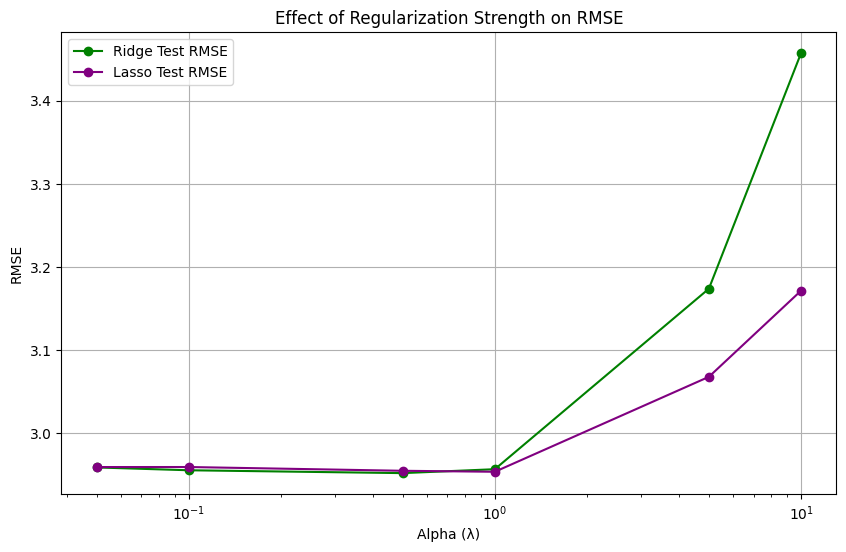

In [ ]:
np.random.seed(42)
X = np.random.uniform(-1, 1, 100)
epsilon = np.random.normal(0, 1, 100)
y = X**4 - 4*(X**3) + 16*X + 4*epsilon
X_train, X_test = X[20:].reshape(-1, 1), X[:20].reshape(-1, 1)
y_train, y_test = y[20:], y[:20]
lambdas = [0.05, 0.1, 0.5, 1, 5, 10]
rmse_ridge_test = []
rmse_lasso_test = []

for reg_lambda in lambdas:
    ridge_model = PolynomialRegressorGD(degree=11, learning_rate=0.01, epochs=50000, reg_lambda=reg_lambda, reg_type='ridge')
    ridge_model.fit(X_train, y_train)
    y_test_pred = ridge_model.predict(X_test)
    rmse_ridge_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    lasso_model = PolynomialRegressorGD(degree=11, learning_rate=0.01, epochs=50000, reg_lambda=reg_lambda, reg_type='lasso')
    lasso_model.fit(X_train, y_train)
    y_test_pred = lasso_model.predict(X_test)
    rmse_lasso_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.figure(figsize=(10, 6))
plt.plot(lambdas, rmse_ridge_test, label='Ridge Test RMSE', marker='o', color='green')
plt.plot(lambdas, rmse_lasso_test, label='Lasso Test RMSE', marker='o', color='purple')
plt.xscale('log')
plt.xlabel('Alpha (\u03bb)')
plt.ylabel('RMSE')
plt.title('Effect of Regularization Strength on RMSE')
plt.legend()
plt.grid()
plt.show()

**Can you explain the behaviour of RMSE for both ridge and lasso regularization?**

**Ans:** Both of them reduce overfitting by penalizing large coefficients. Ridge typically results in smoother models by shrinking all coefficients, while lasso encourages sparsity, setting some coefficients to zero. This reduces RMSE more effectively for overfitted models but may underperform for simpler models.

Generate a new sample dataset using the following formula:

$$
y = 2 \sin\left(\frac{\pi}{2} x\right) + \frac{1}{2} ϵ \quad , \quad x \in [-4, 4]
$$

where $ ϵ $ represents noise sampled from a $\mathcal{N}(0, 1) $ distribution. Plot the fitted polynomial with degrees ranging from 4 to 12 as well as the RMSE:


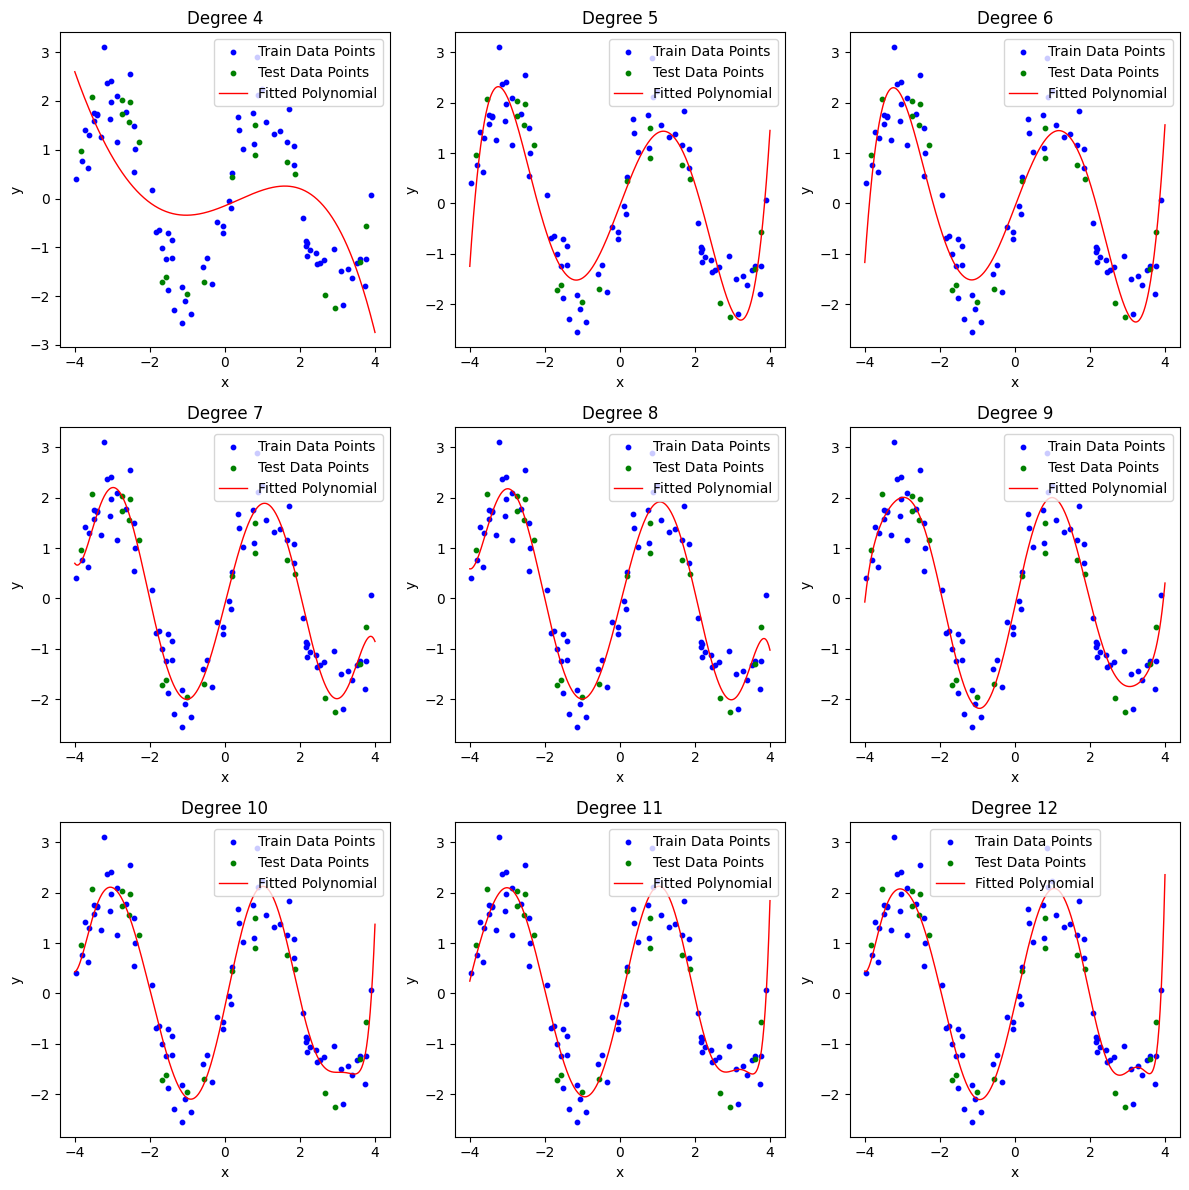

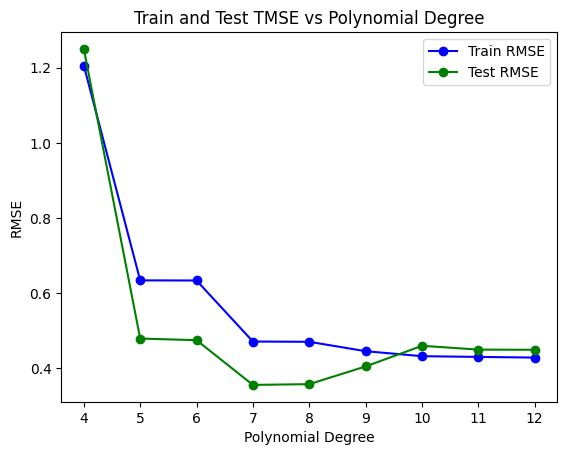

In [ ]:
np.random.seed(42)
X = np.random.uniform(-4, 4, 100)
epsilon = np.random.normal(0, 1, 100)
y = 2 * np.sin(np.pi / 2 * X) + epsilon/2


X_train, X_test = X[20:].reshape(-1, 1), X[:20].reshape(-1, 1)
y_train, y_test = y[20:], y[:20]

degrees = range(4, 13)
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()

for idx, degree in enumerate(degrees):
    ax = axes[idx]
    model = PolynomialRegressor(degree)
    model.fit(X_train, y_train)
    X_linspace = np.linspace(-4, 4, 500).reshape(-1, 1)
    y_pred = model.predict(X_linspace)

    ax.scatter(X_train, y_train, color='blue', label='Train Data Points', s=10)
    ax.scatter(X_test, y_test, color='green', label='Test Data Points', s=10)
    ax.plot(X_linspace, y_pred, color='red', label='Fitted Polynomial', linewidth=1)
    ax.set_title(f"Degree {degree}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

plt.tight_layout()
plt.show()


rmse_train, rmse_test = [], []
for degree in degrees:
    model = PolynomialRegressor(degree)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.plot(degrees, rmse_train, color='blue', label='Train RMSE', marker='o')
plt.plot(degrees, rmse_test, color='green', label='Test RMSE', marker='o')
plt.legend()
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('Train and Test TMSE vs Polynomial Degree')
plt.show()

**Does this RMSE plot confirm your previous knowledge of the bias-variance tradeoff?**

**Ans:** Yes, the RMSE plot aligns with the bias-variance tradeoff. As the polynomial degree increases, bias decreases, and the model fits the data better. But beacuse we used regularization the test error did't change alot after some point


**Could you explain what is the reason behind the change in behavior of RMSE after some degree? (Hint: you may look at the interval chosen)**

**Ans:** The interval chosen for the degree range affects when and how these regularization effects dominate. For higher degrees, the penalties imposed by ridge and lasso become more significant, curbing overfitting while maintaining generalization.


Using the previously created sample dataset, fit a polynomial regression model of degree 11. Test the RMSE of the model with regularization parameter values $ \{0.05, 0.1, 0.5, 1, 5, 10\} $.  

Plot the results to visualize the effect of $ \lambda $ on model performance.  


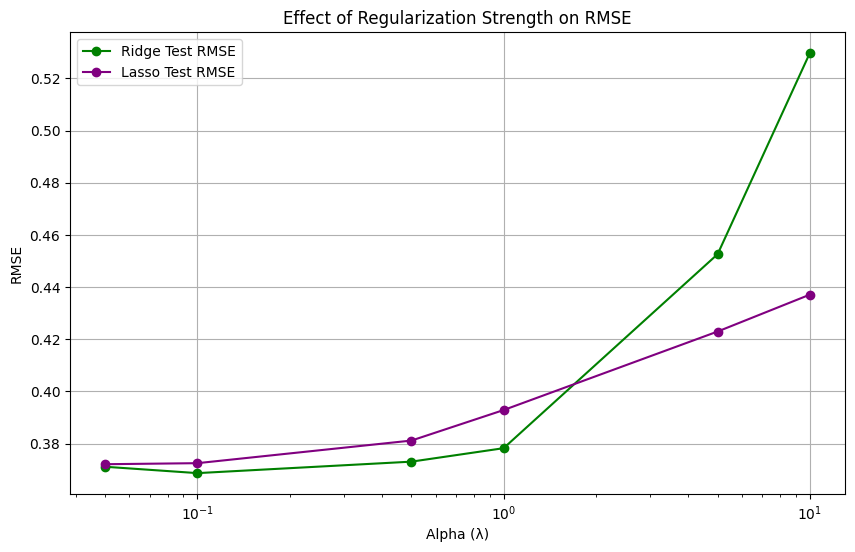

In [ ]:
np.random.seed(42)
X = np.random.uniform(-1, 1, 100)
epsilon = np.random.normal(0, 1, 100)
y = 2 * np.sin(np.pi / 2 * X) + epsilon/2
X_train, X_test = X[20:].reshape(-1, 1), X[:20].reshape(-1, 1)
y_train, y_test = y[20:], y[:20]

lambdas = [0.05, 0.1, 0.5, 1, 5, 10]
rmse_ridge_test = []
rmse_lasso_test = []

for reg_lambda in lambdas:
    ridge_model = PolynomialRegressorGD(degree=11, learning_rate=0.01, epochs=50000, reg_lambda=reg_lambda, reg_type='ridge')
    ridge_model.fit(X_train, y_train)
    y_test_pred = ridge_model.predict(X_test)
    rmse_ridge_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    lasso_model = PolynomialRegressorGD(degree=11, learning_rate=0.01, epochs=50000, reg_lambda=reg_lambda, reg_type='lasso')
    lasso_model.fit(X_train, y_train)
    y_test_pred = lasso_model.predict(X_test)
    rmse_lasso_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.figure(figsize=(10, 6))
plt.plot(lambdas, rmse_ridge_test, label='Ridge Test RMSE', marker='o', color='green')
plt.plot(lambdas, rmse_lasso_test, label='Lasso Test RMSE', marker='o', color='purple')
plt.xscale('log')
plt.xlabel('Alpha (\u03bb)')
plt.ylabel('RMSE')
plt.title('Effect of Regularization Strength on RMSE')
plt.legend()
plt.grid()
plt.show()

**Can you explain the behaviour of RMSE for both ridge and lasso regularization?**

**Ans:** As i said before both of them reduce overfitting by penalizing large coefficients. Ridge typically results in smoother models by shrinking all coefficients, while lasso encourages sparsity, setting some coefficients to zero. This reduces RMSE more effectively for overfitted models but may underperform for simpler models.

**What is the main difference between this section and the last section?**

**Ans:** This section introduces regularization to control overfitting and improve generalization, whereas the last section primarily focused on polynomial degree without any regularization.

## Poissson Regression (40 points)

Poisson regression is a type of Generalized Linear Model (GLM) used for modeling count data and event occurrence rates. It assumes that the response variable $y$ follows a Poisson distribution and models the logarithm of the expected value of $y$ as a linear function of the predictors.

### Characteristics
- **Response Variable**: Count data (non-negative integers).
- **Link Function**: Logarithm function.
- **Assumption**: The mean and variance of the response variable are equal (although this can be relaxed in quasi-Poisson models).

### Model Definition
The Poisson regression model can be written as:
$y_i \sim \text{Poisson}(\mu_i)$

where $y_i$ is the observed count for the $i_{th}$ observation, and $\mu_i$ is the expected value of $y_i$.

The relationship between the predictors and $\mu_i$ is expressed as:
$\log(\mu_i) = \mathbf{x}_i^\top \boldsymbol{\beta}$

where:
- $\mathbf{x}_i = [x_{i1}, x_{i2}, \ldots, x_{ip}]^\top$: The vector of predictors for the $i_th$ observation.
- $\boldsymbol{\beta} = [\beta_0, \beta_1, \ldots, \beta_p]^\top$: The vector of coefficients.

Alternatively, in terms of $\mu_i = \exp(\mathbf{x}_i^\top \boldsymbol{\beta})$

### Log-Likelihood Function
The log-likelihood function for Poisson regression is:

$$\ell(\boldsymbol{\beta}) = \sum_{i=1}^n \left[ y_i \log(\mu_i) - \mu_i - \log(y_i!) \right]$$
where $\mu_i = \exp(\mathbf{x}_i^\top \boldsymbol{\beta})$.

### Gradient (Score Function)
The gradient of the log-likelihood with respect to $\beta$ is:
$\frac{\partial \ell}{\partial \boldsymbol{\beta}} = \sum_{i=1}^n \mathbf{x}_i (y_i - \mu_i)$

### Now, write your Poisson Regression class (10 points)

In [20]:
from scipy.special import gammaln

class PoissonRegression:
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = None  # Initialize coefficients

    def _log_likelihood(self, X, y):
        """
        Calculate the log-likelihood for Poisson regression.

        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).
        - y (ndarray): Target values of shape (n_samples,).

        Returns:
        - float: The log-likelihood of the model given the data.
        """
        mu = np.exp(X @ self.beta)
        log_likelihood = np.sum(y * np.log(mu) - mu - np.log(np.arange(1, y.max() + 1)).cumsum())
        return log_likelihood

    def _gradient_descent(self, X, y):
        """
        Perform gradient descent to update the coefficients.

        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).
        - y (ndarray): Target values of shape (n_samples,).

        Returns:
        - None: The model coefficients will be updated in place.
        """
        mu = np.exp(X @ self.beta)
        # print(X)
        # print(y)
        gradient = np.sum(X.T @ (y - mu))
        # print(gradient)
        self.beta += self.learning_rate * gradient

    def fit(self, X, y):
        """
        Fit the Poisson regression model using gradient descent.

        Args:
        - X (ndarray): Input features of shape (n_samples, n_features).
        - y (ndarray): Target values of shape (n_samples,).

        Returns:
        - None: The coefficients will be updated in place.
        """
        n_samples, n_features = X.shape

        self.beta = np.zeros(n_features)
        # print(X)
        for epoch in range(self.epochs):
            self._gradient_descent(X, y)


    def predict(self, x):
        return np.exp(x @ self.beta)

### Generate Dataset (10 points)
Generate poisson data using numpy.

In [21]:
b0 = 1
b1 = 0.15

# poisson data
np.random.seed(42)
n_samples = 100
X = np.random.uniform(0, 20, size=n_samples)
X_design = np.c_[np.ones(n_samples), X]
y_mean = np.exp(b0 + b1 * X)
y = np.random.poisson(y_mean)

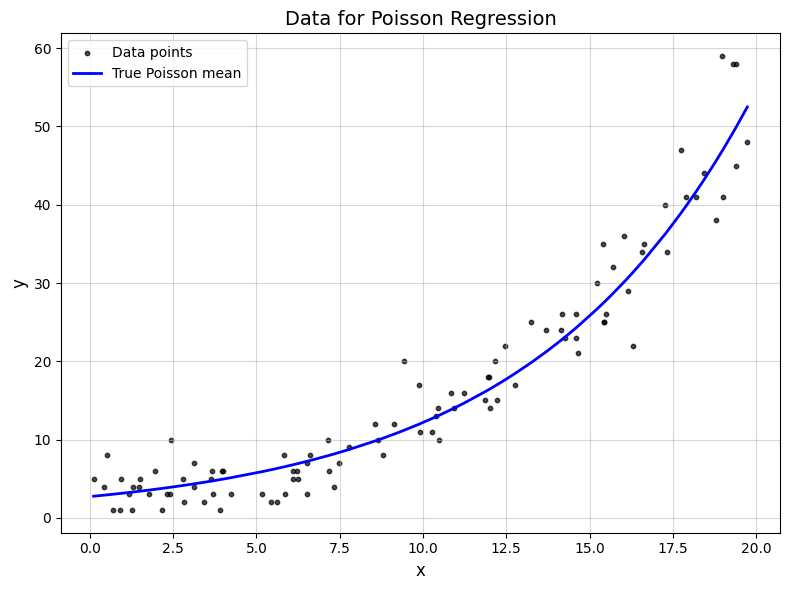

In [22]:
# plot the poisson mean value and the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="Data points", color="black", alpha=0.7, s=10)
sorted_indices = np.argsort(X)
plt.plot(X[sorted_indices], y_mean[sorted_indices], label="True Poisson mean", color="blue", linewidth=2)

plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Data for Poisson Regression", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

### Fit poisson regression on data and plot the predicted poisson regression (10 points)

In [35]:
# fit your poisson regression model
model = PoissonRegression(learning_rate=0.000001, epochs=5000)
model.fit(X_design, y)

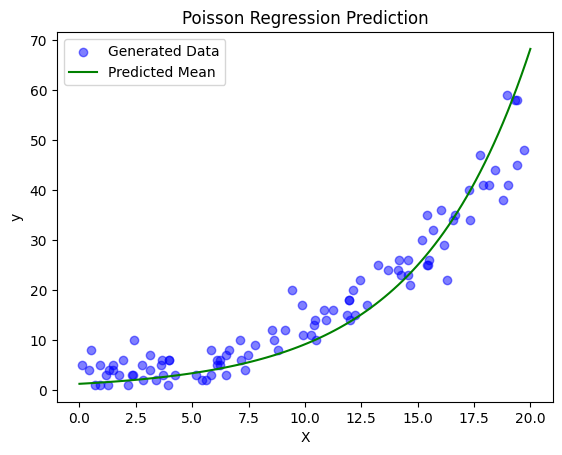

In [47]:
# plot the prediction
X_plot = np.linspace(0, 20, 100)
X_plot_design = np.c_[np.ones(X_plot.shape[0]), X_plot]
predicted_mean = model.predict(X_plot_design)
plt.scatter(X, y, label="Generated Data", color="blue", alpha=0.5)
plt.plot(X_plot, predicted_mean, label="Predicted Mean", color="green")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Poisson Regression Prediction")
plt.legend()
plt.show()

### Use different learning rate and plot your prediction (10 points)

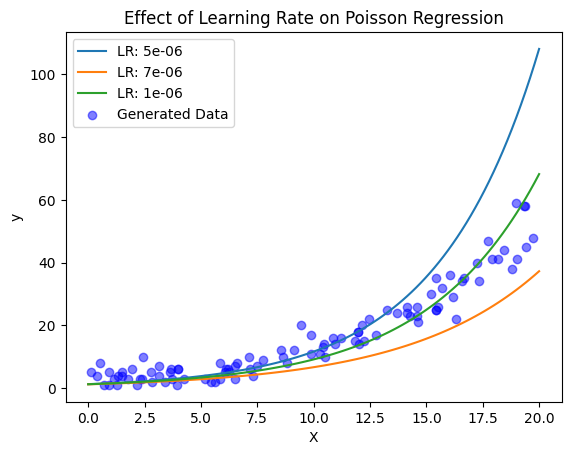

In [48]:
learning_rates = [0.000005, 0.000007, 0.000001]

for lr in learning_rates:
    model = PoissonRegression(learning_rate=lr, epochs=5000)
    model.fit(X_design, y)
    predicted_mean = model.predict(X_plot_design)

    plt.plot(X_plot, predicted_mean, label=f"LR: {lr}")

plt.scatter(X, y, label="Generated Data", color="blue", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Effect of Learning Rate on Poisson Regression")
plt.legend()
plt.show()